In [0]:
import pandas as pd
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Add,concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split

In [2]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd 'drive/My Drive/ECE 657/Part-2/'

/content/drive/My Drive/ECE 657/Part-2


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
train.describe()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,39999.500000,2.002933,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,32.866333,45.783900,51.985883,50.779350,50.425750,53.686350,51.371150,40.467633,25.962700,10.281083,4.034833,1.929250,1.148100,0.842217,0.47675,0.262000,0.08960,0.015167,0.004783,0.020917,0.102850,0.339433,0.741917,2.058883,7.226483,17.394200,32.014417,53.019567,...,92.459967,90.458233,79.041600,62.473383,46.021650,44.367617,47.964333,38.793683,22.335200,9.189950,3.814733,0.622083,0.024617,0.220950,1.03375,4.379250,12.673967,21.02115,21.219867,17.159950,22.219717,30.688333,41.950650,51.574867,52.491717,46.289000,42.470617,45.183467,50.020433,46.359133,34.545900,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850
std,17320.652413,1.415000,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,57.692077,65.947637,68.565341,67.919718,67.397257,69.421676,67.915419,62.725940,51.620728,32.300648,20.015361,13.871987,10.593331,9.214058,7.01254,5.295104,2.78752,1.048501,0.361104,1.133843,3.104964,6.149413,9.589874,15.716790,29.936239,47.877737,65.585449,82.247678,...,100.881732,99.700169,95.036194,88.766993,78.686045,77.236284,83.267721,74.407819,55.982185,37.736031,24.425300,8.175978,1.009238,4.416291,10.07838,20.894199,37.020302,49.07243,48.312498,42.208942,48.438714,55.116266,62.242895,68.555227,69.759801,67.367902,66.182219,66.754477,68.685723,66.060666,57.569109,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.

In [5]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [6]:
batch_size = 1024
num_classes = 5
epochs = 300
img_rows, img_cols = 28, 28

x_train = train.drop(['Label', 'Id'], axis=1).to_numpy()
y_train = train['Label'].to_numpy()
x_test = test.drop(['Id'], axis = 1).to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

print(x_val.shape)
print(y_val)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

(6000, 28, 28, 1)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [16]:
#Inception

inputs =  Input(shape = (28,28,1))
x = Conv2D(16, kernel_size=(5,5), activation='relu', padding = 'same')(inputs)
x = Conv2D(16, kernel_size=(5,5), activation='relu', padding = 'same')(x)
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

x = MaxPooling2D(pool_size=(2,2))(x)
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

a1 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(x)
a2 = Conv2D(32, kernel_size=(1,1), activation='relu')(x)
a2 = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same')(a2)
a3 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(x)
a3 = Conv2D(16,kernel_size=(5,5), activation='relu', padding='same')(a3)
a4 = Conv2D(16, kernel_size=(1,1), activation='relu', padding='same')(x)
a4 = MaxPooling2D(pool_size = (3,3), strides=(1,1), padding='same')(a4)
x = concatenate([a1,a2,a3,a4], axis=-1)

x = Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same')(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same')(x)
#model.add(BatchNormalization())
x = Dropout(0.4)(x)
x = MaxPooling2D(pool_size=(2,2))(x)

#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

#model.add(Conv2D(64, kernel_size=(1,1), activation='relu', padding = 'same'))

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
pred = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = inputs, outputs = pred)

#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.0008), metrics = ['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 16)   416         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 16)   6416        conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 16)   0           conv2d_11[0][0]                  
____________________________________________________________________________________________

In [17]:
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Epoch 1/300
53/53 [==============================] - 7s 125ms/step - loss: 1.2499 - accuracy: 0.4066 - val_loss: 1.1030 - val_accuracy: 0.5193
Epoch 2/300
53/53 [==============================] - 6s 116ms/step - loss: 0.9425 - accuracy: 0.5846 - val_loss: 0.9428 - val_accuracy: 0.5745
Epoch 3/300
53/53 [==============================] - 6s 116ms/step - loss: 0.7756 - accuracy: 0.6731 - val_loss: 0.7850 - val_accuracy: 0.6863
Epoch 4/300
53/53 [==============================] - 6s 117ms/step - loss: 0.6848 - accuracy: 0.7171 - val_loss: 0.6627 - val_accuracy: 0.7492
Epoch 5/300
53/53 [==============================] - 6s 116ms/step - loss: 0.6317 - accuracy: 0.7419 - val_loss: 0.6158 - val_accuracy: 0.7698
Epoch 6/300
53/53 [==============================] - 6s 116ms/step - loss: 0.6094 - accuracy: 0.7486 - val_loss: 0.6146 - val_accuracy: 0.7792
Epoch 7/300
53/53 [==============================] - 6s 116ms/step - loss: 0.5954 - accuracy: 0.7529 - val_loss: 0.6139 - val_accuracy: 0.7522

In [18]:
import time
start = time.time()
score = model.evaluate(x_val, y_val, verbose = 0)
end = time.time()
print("Time taken for testing data: ", end-start)
print("Validation Accuracy: ", score)

Time taken for testing data:  0.9785771369934082
Validation Accuracy:  [0.4083390235900879, 0.8765000104904175]


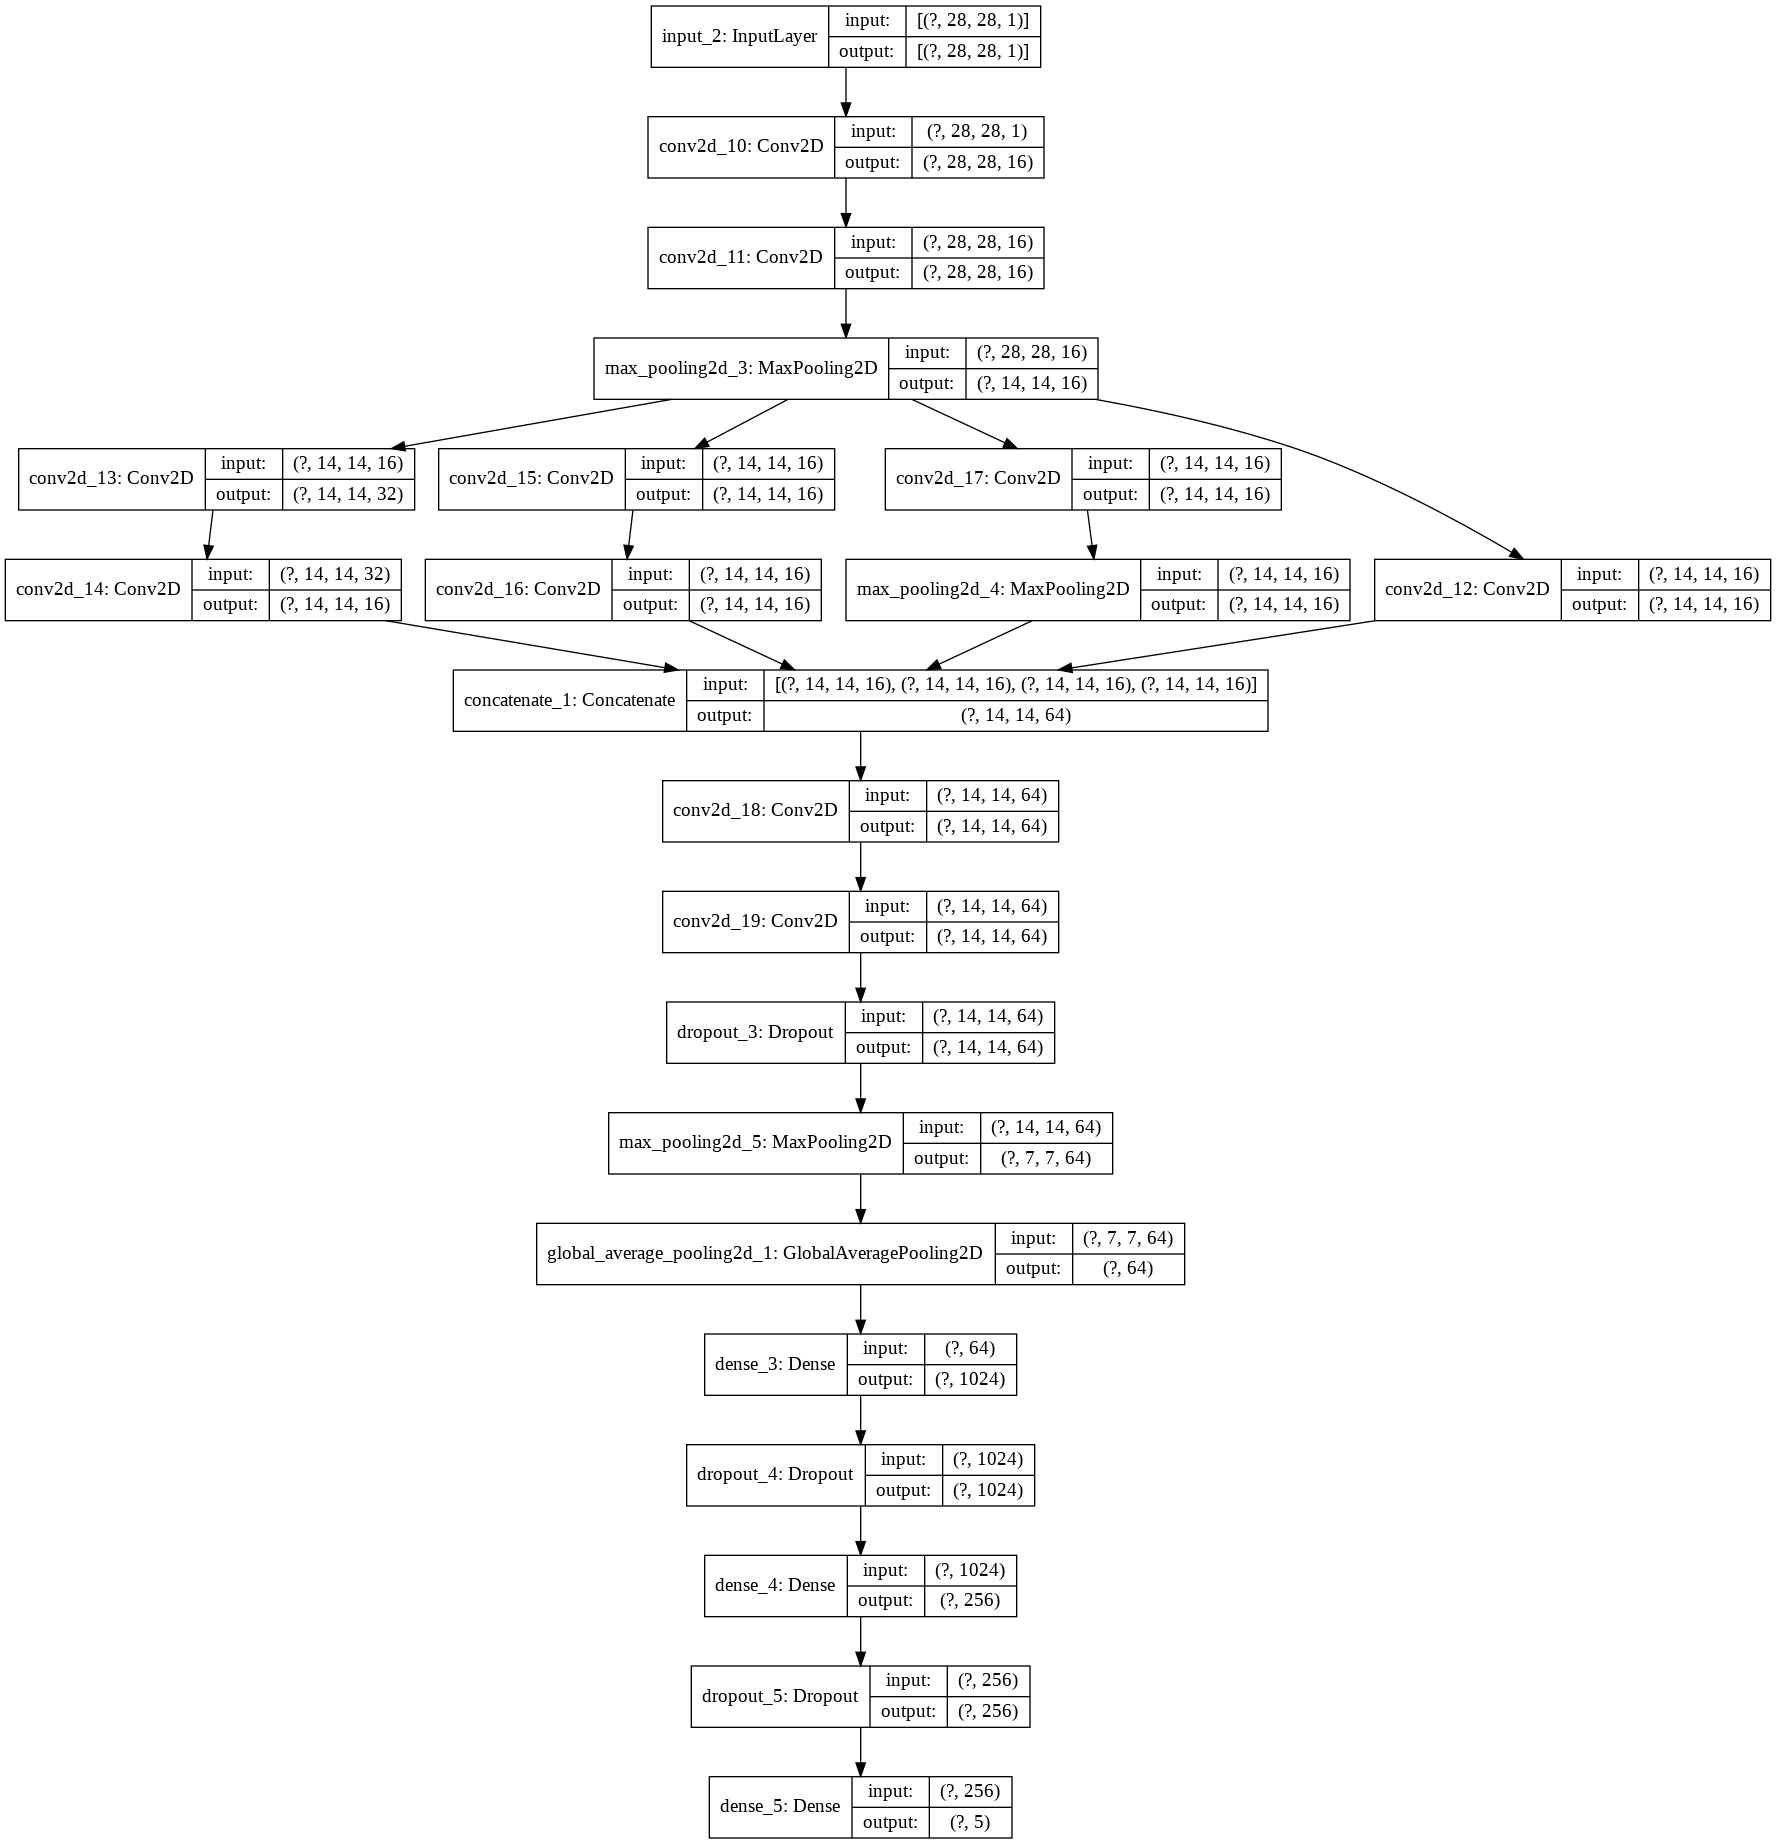

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model_inception.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [20]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(x_val, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_val.argmax(axis=-1), yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.876500
Precision: 0.876500
Recall: 0.876500
F1 score: 0.876500
Cohens kappa: 0.845643
ROC AUC: 0.985427
[[[4765   45]
  [  45 1145]]

 [[4603  167]
  [ 117 1113]]

 [[4542  276]
  [ 133 1049]]

 [[4596  229]
  [ 222  953]]

 [[4753   24]
  [ 224  999]]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


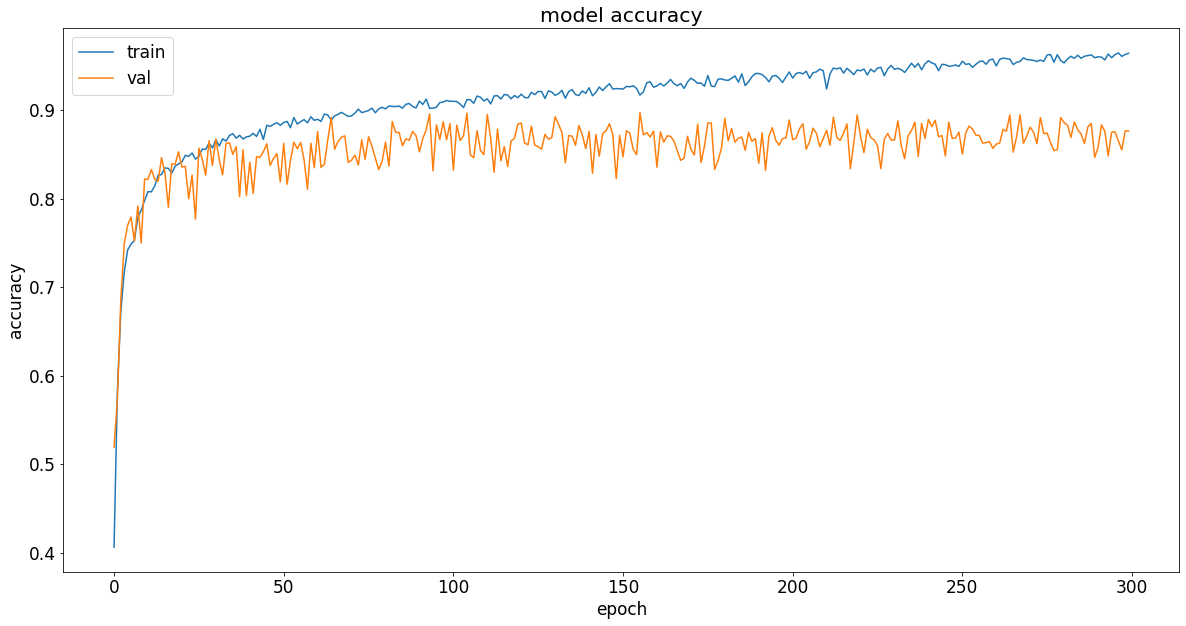

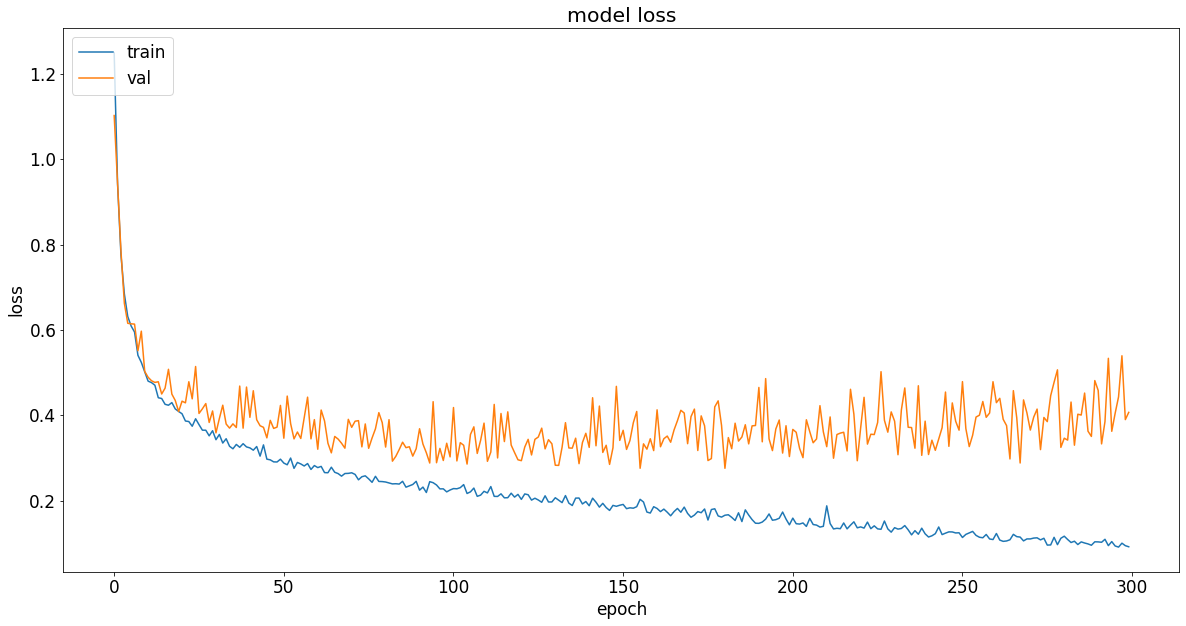

In [21]:
#plt.rcParams['xtick.labelsize'] = 17
#plt.rcParams['ytick.labelsize'] = 17
#plt.rcParams['xlabel.fontsize'] = 17
plt.rcParams['font.size'] = 17
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
x_test = test.drop(['Id'], axis = 1).to_numpy()
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255
y_sol = model.predict(x_test)
y_sol = y_sol.argmax(axis=-1)
y_sol

array([3, 4, 2, ..., 3, 1, 2])

In [0]:
df_solution = pd.DataFrame(np.arange(0, x_test.shape[0]), columns=['Id'])
df_solution['Label'] = y_sol

In [24]:
df_solution

,Id,Label
0,0,3
1,1,4
2,2,2
3,3,1
4,4,0
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,1
